# Data Wrangling 

In [2]:
import pandas as pd
import numpy as np

## Su tutti i dati 

### Combinazione e Merging di Dataset

Esistono piu modi per combinare i dati in *pandas*: 
- `pandas.concat`: concatena due oggetti lungo un asse,
- `pandas.merge`: implementazione dell'operazione di *join* fra oggetti,
- `combine_first`: sostituzione dei valori mancanti di un dataset con quelli presenti in un altro.

> 
> **🤝 Operazione di Join nei Dataframe**
>
>L'operazione di **Join** è fondamentale nell'analisi dei dati e serve a **combinare due dataframe o tabelle** basandosi sui valori di una o più **colonne chiave** (la colonna di *join*). Il risultato è una nuova tabella che espande le righe di un dataframe con i dati del secondo, dove le righe combinate soddisfano una specifica condizione di corrispondenza. 
>
> 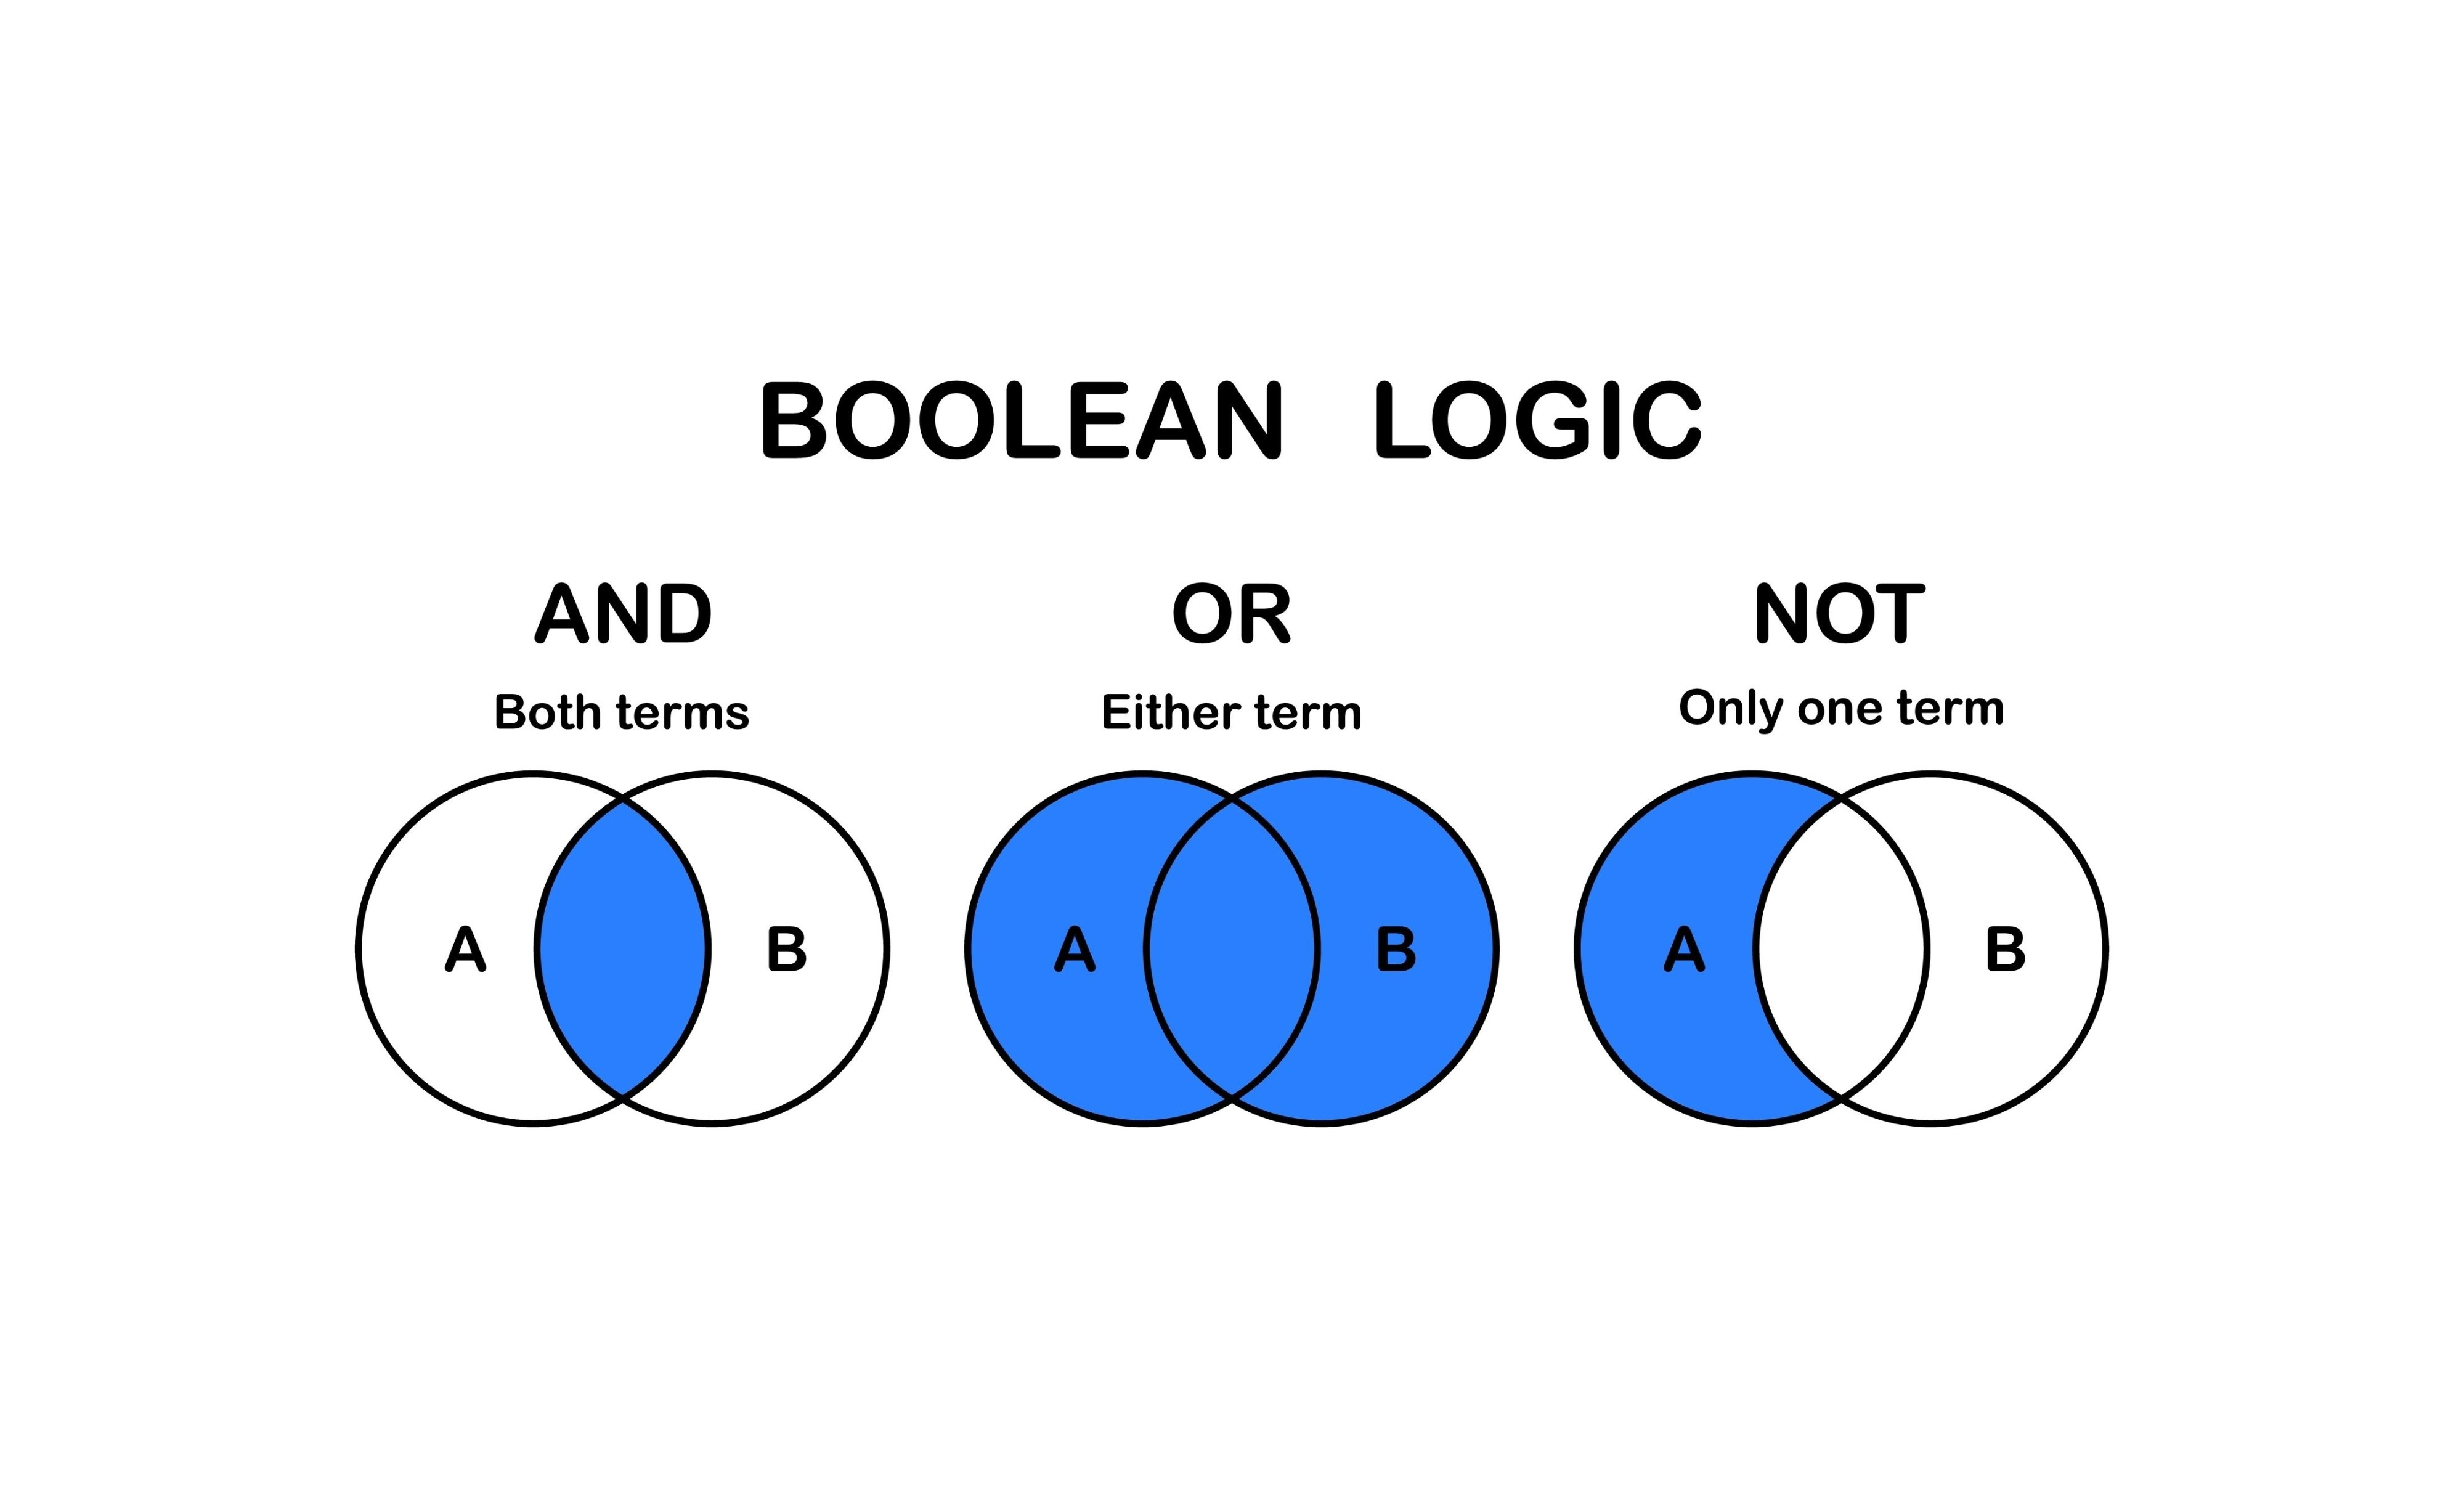
>
>
>
>
>**Tipi di Join:**
>
>La differenza principale tra i vari tipi di join risiede in **quali righe vengono mantenute** nella tabella risultante, specialmente quando una corrispondenza nella colonna chiave **non esiste** in uno dei due dataframe. I tipi più comuni sono:
>
>1. **INNER JOIN** (Intersezione)
>
>* **Risultato:** Include **solo** le righe che hanno valori **corrispondenti** nella colonna chiave *in **entrambi** i dataframe* (l'intersezione).
>* **Dati Persi:** Le righe che non hanno una corrispondenza nell'altro dataframe vengono **scartate**.
>* **Descrizione:** Nella tabella risultante, per ogni coppia di righe corrispondenti, si trovano le permutazioni dei valori che si trovano nell'intersezione dei valori della colonna di join.
>
>2. **OUTER JOIN** (Unione)
>
>Questo tipo di join unisce i risultati di entrambi i dataframe, **mantenendo tutte le righe** e inserendo valori `NULL` (o `NaN` in alcuni contesti) per le colonne che non hanno una corrispondenza. Si divide in:
>
>* **FULL OUTER JOIN** (Unione Completa):
>    * **Risultato:** Include tutte le righe con corrispondenza **più** tutte le righe senza corrispondenza da **entrambi** i dataframe (l'unione).
>    * **Dati Persi:** Nessuna riga viene persa; dove non c'è corrispondenza, i valori vengono riempiti con `NULL`.
>
>* **LEFT OUTER JOIN** (o semplicemente **LEFT JOIN**):
>    * **Risultato:** Include tutte le righe dal dataframe **di sinistra** e le righe corrispondenti dal dataframe di destra.
>    * **Dati Persi:** Le righe del dataframe di **destra** senza corrispondenza nel sinistro vengono **scartate**. I valori mancanti a destra vengono riempiti con `NULL`.
>
>* **RIGHT OUTER JOIN** (o semplicemente **RIGHT JOIN**):
>    * **Risultato:** Include tutte le righe dal dataframe **di destra** e le righe corrispondenti dal dataframe di sinistra.
>    * **Dati Persi:** Le righe del dataframe di **sinistra** senza corrispondenza nel destro vengono **scartate**. I valori mancanti a sinistra vengono riempiti con `NULL`.

#### pandas `merge`

In [38]:
df1 = pd.DataFrame(
    {
        'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
        'data1': pd.Series(range(7), dtype = 'Int64')
    }
)

df2 = pd.DataFrame(
    {
        'key': ['a', 'b', 'd'],
        'data2': pd.Series(range(3), dtype = 'Int64')
    }
)

In [41]:
print(df1)
print('\n\n\n')
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6




  key  data2
0   a      0
1   b      1
2   d      2


In [ ]:
# operazione di join
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [ ]:
# inner join sulle colonne: nella tabella finale troviamo solamente i valori che si trovano nell'intersezione delle tabelle
pd.merge(df1,  df2, on='key') # equivalent

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [44]:
df3 = pd.DataFrame(
    {
        'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
        'data1': pd.Series(range(7), dtype = 'Int64')
    }
)

df4 = pd.DataFrame(
    {
        'rkey': ['a', 'b', 'd'],
        'data2': pd.Series(range(3), dtype = 'Int64')
    }
)

In [46]:
# joining two columns but with different names
pd.merge(df3, df4, left_on = 'lkey', right_on = 'rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,a,4,a,0
4,a,5,a,0
5,b,6,b,1


In [ ]:
# outer joing: considering all the columns of the two operands
pd.merge(df1, df2, how = 'outer')

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,c,3,<NA>
7,d,<NA>,2


In [48]:
pd.merge(df3, df4, left_on = 'lkey', right_on = 'rkey', how = 'outer')

,lkey,data1,rkey,data2
0,a,2,a,0
1,a,4,a,0
2,a,5,a,0
3,b,0,b,1
4,b,1,b,1
5,b,6,b,1
6,c,3,NaN,<NA>
7,NaN,<NA>,d,2


In [53]:
# merge on multiple values
left = pd.DataFrame(
    {
        'key1': ['foo', 'foo', 'bar'],
        'key2': ['one', 'two', 'one'],
        'lval': pd.Series([1,2,3], dtype = 'Int64')
    }
)

right = pd.DataFrame(
    {
        'key1': ['foo', 'foo', 'bar', 'bar'],
        'key2': ['one', 'two', 'one', 'two'],
        'rval': pd.Series([4,5,6,7], dtype = 'Int64')
    }
)

print(
    f'{pd.merge(left, right, on = ['key1', 'key2'], how = 'outer')}\n\n'
    f'{right}\n\n'
    f'{left}'
)

  key1 key2  lval  rval
0  bar  one     3     6
1  bar  two  <NA>     7
2  foo  one     1     4
3  foo  two     2     5

  key1 key2  rval
0  foo  one     4
1  foo  two     5
2  bar  one     6
3  bar  two     7

  key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3


In [54]:
# gestire colonne con nomi uguali 
pd.merge(
    left,
    right,
    on = 'key1',
    suffixes = ('_left', '_right')
)

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,two,5
2,foo,two,2,one,4
3,foo,two,2,two,5
4,bar,one,3,one,6
5,bar,one,3,two,7


La funzione `merge` permette di operare in molte maniere diverse. Per una completa trattazione della funzione si suggerisce di consultare la [documentazione](https://pandas.pydata.org/docs/reference/api/pandas.merge.html).

Il `join` puo anche essere effettuato sulle righe invece che sulle colonne. 

In [58]:
# join sulle righe

left1 = pd.DataFrame(
    {
        'key': ['a', 'b', 'a','a','b', 'c'],
        'value': pd.Series(range(6), dtype = 'Int64')
    }
)

right1 = pd.DataFrame(
    {
        'group_val': [3.5, 7]
    },
    index = ['a', 'b']
)

pd.merge(left1, right1, left_on='key', right_index = True)

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0


In [59]:
pd.merge(left1, right1, left_on='key', right_index = True, how = 'outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


Il `merge` puo anche essere effettutato su tabelle gerarchiche, specificando bene le colonne di `join`. 

In [64]:
lefth = pd.DataFrame(
    {
        'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'key2': [2000, 2001, 2002, 2001, 2002],
        'data': pd.Series(range(5), dtype = 'Int64')
    }
)

right_index = pd.MultiIndex.from_arrays(
    [
        ['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
        [2001, 2000, 2000, 2000, 2001, 2002]
    ]
)
righth = pd.DataFrame(
    {
        'event1': pd.Series([0, 2, 4, 6, 8, 10], dtype = 'Int64', index = right_index),
        'event2': pd.Series([1,3,5,7,9,11], dtype = 'Int64', index = right_index)
    }
)

print(lefth)
print('\n\n\n')
print(righth)

     key1  key2  data
0    Ohio  2000     0
1    Ohio  2001     1
2    Ohio  2002     2
3  Nevada  2001     3
4  Nevada  2002     4




             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11


In [65]:
pd.merge(lefth, righth, left_on = ['key1', 'key2'], right_index = True)

,key1,key2,data,event1,event2
0,Ohio,2000,0,4,5
0,Ohio,2000,0,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11
3,Nevada,2001,3,0,1


#### *pandas* `concatenate`

Questa operazione permette di unire due o piu oggetti in *pandas*, tenendo conto degli assi in maniera dinamica. 

In [66]:
s1 = pd.Series([0,1], index = ['a', 'b'], dtype = 'Int64')
s2 = pd.Series([2,3,4], index = ['c', 'd', 'e'], dtype = 'Int64')
s3 = pd.Series([5, 6], index = ['f', 'g'], dtype = 'Int64')

In [ ]:
pd.concat([s1,s2,s3]) # by rows by default

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: Int64

In [ ]:
# creating a concatenation index (hierarchical table)
pd.concat([s1,s2,s3], keys = ['one', 'two', 'three'])

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: Int64

In [ ]:
# creating a flat table 
pd.concat([s1,s2,s3], keys = ['one', 'two', 'three']).unstack()

,a,b,c,d,e,f,g
one,0,1,<NA>,<NA>,<NA>,<NA>,<NA>
two,<NA>,<NA>,2,3,4,<NA>,<NA>
three,<NA>,<NA>,<NA>,<NA>,<NA>,5,6


In [69]:
pd.concat([s1,s2,s3], axis = 'columns') 

,0,1,2
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [ ]:
# creating a named in the result table 
pd.concat([s1,s2,s3], axis = 'columns', keys = ['one', 'two', 'three']) 

,one,two,three
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [81]:
# to DataFrame objects
df1 = pd.DataFrame(
    np.arange(6).reshape(3,2), index = ['a', 'b', 'c'], columns = ['one', 'two']
)
df2 = pd.DataFrame(
    5 + np.arange(4).reshape(2,2), index = ['a', 'c'], columns = ['three', 'four']
)
print(df1)
print('\n\n')
print(df2)

   one  two
a    0    1
b    2    3
c    4    5



   three  four
a      5     6
c      7     8


In [82]:
pd.concat({'level1':df1, 'level2':df2}, axis = 'columns')

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [83]:
pd.concat({'level1':df1, 'level2':df2}, axis = 'columns', keys = ['level1', 'level2'], names = ['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [ ]:
s4 = pd.concat([s1, s3]) # outer join by default 
pd.concat([s1, s4], axis = 'columns')

,0,1
a,0,0
b,1,1
f,<NA>,5
g,<NA>,6


In [73]:
print(s4)
print('\n\n\n')
print(s1)

a    0
b    1
f    5
g    6
dtype: Int64




a    0
b    1
dtype: Int64


In [74]:
s5 = pd.concat([s1, s4], axis = 'columns', join = 'inner')
s5

,0,1
a,0,0
b,1,1


#### *pandas* `overlap`

Questa operazione permette di sovrapporre due *DataFrame* diversi, questa operazione non puo essere espressa ne in termini di *merging* (*join*) e nemmeno in termini di *concatenate*. Per questo *pandas* offre la funzione `overlap`.

Questa operazione e molto utile perche permette di computare i dati mancanti con quelli presenti in un'altra tabella di uguali dimensioni.

In [86]:
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
            index = ['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5.],
            index = ['a', 'b', 'c', 'd', 'e', 'f'])
print(a)
print('\n')
print(b)

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64


a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64


In [ ]:
# sovrapposizione dei dati: a sovrapposto a b
a.combine_first(b)

a    0.0
b    4.5
c    3.5
d    0.0
e    2.5
f    5.0
dtype: float64

In [88]:
df1 = pd.DataFrame(
    {
    'a':[1., np.nan, 5., np.nan],
    'b':[np.nan, 2., np.nan, 6.],
    'c':range(2,18,4)
    }
)
df2 = pd.DataFrame({
    'a': [5., 4., np.nan, 3., 7],
    'b': [np.nan, 3., 4., 6., 8.]
})
print(df1)
print('\n\n')
print(df2)

     a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14



     a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0


In [ ]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


> **Funzionamento**
>
> Ci si deve immaginare di sovrapporre il primo DataFrame al secondo e di imputare i dati mancanti nel primo con quelli presenti nel secondo.

### Reshaping e Pivoting 

In questa sezione parleremo di come riorganizzare i dati nelle tabelle in maniera *efficiente*. 

La gestione delle tabelle gerachiche e semplice grazie al meccanismo di rotazione intorno ai pivot. Lo operazione sono: 
1. `stack`
2. `unstack`

In [94]:
data = pd.DataFrame(
    np.arange(6).reshape((2,3)),
    index = pd.Index(['Ohio', 'Colorado'], name = 'state'),
    columns = pd.Index(['one', 'two', 'three'], name = 'number'),
)
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [ ]:
# gira le colonne sulle righe 
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [98]:
# gira l'indice delle righe interno sulle colonne
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [99]:
# specificare quale indice delle righe girare 
result.unstack(level = 0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [104]:
# attenzione: nel caso di unstack si potrebbero generare dei valori mancanti nel caso di gruppi non sovrapponibili
s1 = pd.Series([0,1,2,3], index = ['a', 'b', 'c', 'd'], dtype = 'Int64')
s2 = pd.Series([4,5,6], index = ['c', 'd', 'e'], dtype = 'Int64')
data2 = pd.concat([s1, s2], keys = ['one', 'three'])

print(s1)
print('\n\n')
print(s2)
print('\n\n')
print(data2)
print('\n\n')
print(data2.unstack())
print('\n\n')
print(data2.unstack().stack())
print('\n\n')
print(data2.unstack().stack(dropna = False))

a    0
b    1
c    2
d    3
dtype: Int64



c    4
d    5
e    6
dtype: Int64



one    a    0
       b    1
       c    2
       d    3
three  c    4
       d    5
       e    6
dtype: Int64



          a     b  c  d     e
one       0     1  2  3  <NA>
three  <NA>  <NA>  4  5     6



one    a    0
       b    1
       c    2
       d    3
three  c    4
       d    5
       e    6
dtype: Int64



one    a       0
       b       1
       c       2
       d       3
       e    <NA>
three  a    <NA>
       b    <NA>
       c       4
       d       5
       e       6
dtype: Int64


/tmp/ipykernel_8570/2628823577.py:16: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  print(data2.unstack().stack(dropna = False))


## Su dati specifici (multidimensionali)

I dati multimensionali possono essere gestiti in *pandas* in maniera semplice tramite il **hierarchical indexing**. Questo metodo permette di inserire indici multipli sullo stesso asso del  *DataFrame* o della *Series*. 

In [3]:
data = pd.Series(np.random.uniform(size = 9),
index = [['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
[1,2,3,1,3,1,2,2,3]])
data

a  1    0.101477
   2    0.301051
   3    0.849676
b  1    0.882435
   3    0.637452
c  1    0.720618
   2    0.178375
d  2    0.206917
   3    0.402201
dtype: float64

In [4]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [5]:
data['b']

1    0.882435
3    0.637452
dtype: float64

In [6]:
data['b':'c']

b  1    0.882435
   3    0.637452
c  1    0.720618
   2    0.178375
dtype: float64

In [8]:
data.loc[['b','d']]

b  1    0.882435
   3    0.637452
d  2    0.206917
   3    0.402201
dtype: float64

In [ ]:
# selection from an inner level 
data.loc[:,2]

a    0.301051
c    0.178375
d    0.206917
dtype: float64

In [10]:
# unstacking the data 
data.unstack()

,1,2,3
a,0.101477,0.301051,0.849676
b,0.882435,NaN,0.637452
c,0.720618,0.178375,NaN
d,NaN,0.206917,0.402201


In [ ]:
# hierarchical indexing with DataFrame 
frame = pd.DataFrame(
    np.arange(12).reshape((4,3)),
    index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
    columns = [['Ohio', 'Ohio', 'Colorado'],
                ['Green', 'Red', 'Green']]
)
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [ ]:
# naming the axes 
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame 

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [16]:
# number of levels in a hierarchical array 
frame.index.nlevels

2

In [17]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [21]:
# creating  MultiIndex object
mult_ind = frame.columns
mult_ind

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

In [22]:
# creaintg a MultiIndex
mult_ind_2 = pd.MultiIndex.from_arrays(
    [['Ohio', 'Ohio', 'Colorado'],
    ['Green', 'Red', 'Green']],
    names = ['state', 'color']
)
mult_ind_2

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

Dato un *DataFrame* gerarchico e semplice modificarlo senza alterarne i dati.

In [ ]:
# changes levels but data remain unaltered 
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [ ]:
# sorting lexicographcally (2nd index of the rows)
frame.sort_index(level = 1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [26]:
frame.swaplevel(0,1).sort_index(level = 0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

> 📈 **Performance** dell'accesso ai dati
>
> La performance di accesso ai dati e migliore nel caso di oggetto organizzato gerarchicamente a partire dagli indici piu  esterni con `sort_index(0)` oppure `sort_index()`. 

E un'operazione comune quella di riorganizzare un *DataFrame*. L'API di *pandas* anche in questo caso ci rende la vita molto facile. Generalmente potremmo voler organizare gerarchicamente un dataset per migliorarne la leggibilita. 

In [33]:
frame = pd.DataFrame({
    'a': range(7),
    'b': range(7, 0, -1),
    'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
    'd': [0,1,2,0,1,2,3]
})

frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [ ]:
# creating a new hierarchical frame from an old one 
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [35]:
# creating a planar frame from a hierarhcical one 
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


Inoltre molte delle statistiche descrittive che possono essere calcolate su un *DataFrame* hanno un parametro `level` he puo essere specificato nel caso si voglia calcolare quella particolare statistica su un livello del *DataFrame* in particolare. 

In [29]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
# grouping an computgin stastic
frame.groupby(level = 'key2').sum()

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [32]:
frame.groupby(level = 'color', axis = 'columns').sum()

/tmp/ipykernel_8570/2094221540.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  frame.groupby(level = 'color', axis = 'columns').sum()


color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

# 📝 Esercizi di Data Wrangling in Pandas

## Parte 1: Merging e Concatenating

### 1. Domanda a Risposta Multipla (INNER JOIN):

> Dati due DataFrame df1 e df2 con una colonna comune denominata 'key', quale sarà il risultato dell'operazione di default pd.merge(df1, df2)?

A. Un'unione completa (FULL OUTER JOIN), che mantiene tutte le righe e riempie i valori mancanti con NaN. B. Un'unione a sinistra (LEFT JOIN), che mantiene tutte le righe di df1. C. Un'intersezione (INNER JOIN), che include solo le righe con valori corrispondenti in entrambe le tabelle. D. Un errore, poiché la colonna di join deve essere specificata esplicitamente.

### 2. Esercizio Pratico (OUTER JOIN con Chiavi Diverse):

Considerando i DataFrame df3 e df4 definiti nel tuo notebook:

In [ ]:
df3 = pd.DataFrame(
    {'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
     'data1': pd.Series(range(7), dtype = 'Int64')}
)
df4 = pd.DataFrame(
    {'rkey': ['a', 'b', 'd'],
     'data2': pd.Series(range(3), dtype = 'Int64')}
)

> Quali parametri aggiuntivi sono necessari per eseguire un FULL OUTER JOIN tra df3 e df4 che produca tutte le combinazioni possibili (comprese le righe di 'c' da df3 e 'd' da df4)?

- how='outer', left_on='lkey', right_on='rkey'

- how='outer', on='key'

- how='outer', left_index=True, right_index=True

**Risposta**: pd.merge(df3, df4, how='outer', left_on='lkey', right_on='rkey')

### 3. Domanda a Risposta Multipla (Concatenation):

> Date tre Series (s1, s2, s3) con indici non sovrapposti, cosa produce il codice pd.concat([s1, s2, s3], axis='columns', keys=['A', 'B', 'C'])?

A. Una singola Series con un indice gerarchico su due livelli. B. Un DataFrame con gli indici originali sulle righe e un indice a colonna gerarchico a due livelli (A, B, C sopra le colonne 0, 1, 2). C. Un DataFrame con NaN solo dove le Series non si sovrappongono. D. Un errore, poiché axis='columns' richiede un allineamento perfetto degli indici.

### 4. Esercizio Pratico (Allineamento in Concatenation):

Considerando le Series s1 e s4 definite nel tuo notebook:

In [ ]:
s1 = pd.Series([0,1], index = ['a', 'b'], dtype = 'Int64')
s3 = pd.Series([5, 6], index = ['f', 'g'], dtype = 'Int64')
s4 = pd.concat([s1, s3]) 
# s4 ha indici ['a', 'b', 'f', 'g']

> Quale sarà l'indice del DataFrame risultante dall'operazione pd.concat([s1, s4], axis='columns', join='inner')?

    ['a', 'b', 'f', 'g']

    ['a', 'b']

    ['f', 'g']

Risposta: ['a', 'b']. L'argomento join='inner' forza la concatenazione a mantenere solo l'intersezione degli indici di riga delle due Series.

## Parte 2: Overlapping e Reshaping

### 5. Domanda a Risposta Multipla (Overlap):

> A cosa serve il metodo a.combine_first(b) (operazione di overlap) in Pandas, quando a e b sono due Series o DataFrame?

A. Esegue un merge di tipo INNER JOIN tra i due oggetti. B. Esegue una moltiplicazione elemento per elemento, ignorando i valori NaN. C. Sostituisce i valori mancanti (NaN) in a con i valori corrispondenti presenti in b. D. Concatena i due oggetti, dando priorità ai valori di a e scartando i valori di b.

### 6. Esercizio Pratico (Stacking):

Dato il DataFrame data (con un indice di riga 'state' e un indice di colonna 'number'):

In [ ]:
data = pd.DataFrame(
    np.arange(6).reshape((2,3)),
    index = pd.Index(['Ohio', 'Colorado'], name = 'state'),
    columns = pd.Index(['one', 'two', 'three'], name = 'number')
)

> Qual è l'effetto del metodo data.stack()?

Risposta: Ruota (trasforma) l'indice di colonna più interno ('number') in un nuovo livello dell'indice di riga, trasformando il DataFrame in una Series con un indice gerarchico a due livelli.

### 7. Domanda a Risposta Multipla (Unstacking):

> Dopo aver applicato result = data.stack(), quale codice produce un DataFrame in cui l'indice di colonna è basato sul livello dell'indice di riga chiamato 'state'?

A. result.unstack() (Default: ruota il livello più interno, che in questo caso è 'number'). B. result.unstack(level='state') C. result.unstack(level=1) (Default: ruota il livello più esterno, che in questo caso è 'state'). D. result.unstack(level='number')

## Parte 3: Hierarchical Indexing

### 8. Esercizio Pratico (Selezione su MultiIndex):

Dato il seguente Series con MultiIndex:

In [ ]:
data = pd.Series(
    np.random.uniform(size = 9),
    index = [['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'], [1,2,3,1,3,1,2,2,3]]
)

> Scrivi il codice per selezionare tutti i valori in cui il secondo livello dell'indice di riga (livello 1) è uguale a 3.

Risposta: data.loc[:, 3] o data.xs(3, level=1) (utilizzando xs per maggiore chiarezza nel MultiIndex).

### 9. Domanda a Risposta Multipla (Modifica del MultiIndex):

> Dato un DataFrame frame con indici di riga 'key1' (esterno) e 'key2' (interno), l'operazione frame.swaplevel('key1', 'key2').sort_index(level=0) ha lo scopo di:

A. Scambiare i livelli dell'indice di riga e ordinarli per il livello originario 'key1'. B. Scambiare i livelli dell'indice di riga e ordinarli per il livello originario 'key2'. C. Scambiare i livelli dell'indice di riga e ordinarli lessicograficamente per il nuovo livello più esterno ('key2'). D. Ordinare il DataFrame in base al livello più interno, mantenendo l'ordine dei livelli originali.

### 10. Esercizio Pratico (Statistiche su Livello Gerarchico):

Dato il DataFrame frame con indici gerarchici su righe ('key1', 'key2') e colonne ('state', 'color'):

In [ ]:
frame = pd.DataFrame(
    np.arange(12).reshape((4,3)),
    index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
    columns = [['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']]
)
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']

> Scrivi il codice per calcolare la somma dei valori raggruppati per il livello dell'indice di riga 'key1'.

Risposta: frame.groupby(level='key1').sum()